## pandas

In [1]:
import pandas as pd

In [29]:
ds = pd.read_csv('data/Food_Time new.csv')

In [30]:
ds.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


In [44]:
ds.shape

(10000, 17)

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [5]:
ds.columns

Index(['Traffic_Level', 'ID', 'Delivery_person_ID', 'weather_description',
       'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET'],
      dtype='object')

In [55]:
num_cols = ['temperature', 'humidity','precipitation', 'Distance (km)', 'Delivery_person_Age']
cat_cols = ['Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Ratings']

# I am not sure where to put those
id_cols = ['ID', 'Delivery_person_ID',]
coord_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
target_cols = ['TARGET']

len(num_cols) + len(cat_cols) + len(coord_cols) + len(id_cols) + len(target_cols)

17

### Delivery_person_Ratings

тут в 'Delivery_person_Ratings' значення ніби і float64 але так то дискретні: не можна поставити 4.75 зірок, найменший крок 0.1.
то я подумав шо можна дискретизувати його в проміжки [1, 2), [2, 3) ... [5, 6]

In [59]:
sorted(ds['Delivery_person_Ratings'].unique())

[1.0,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 6.0]

In [140]:
# свіснув код з якогось сайтика
def frange (start,end,step):
	if step == 0 : raise ValueError("frange() step argument must not be zero")
	if (end-start)/step <= 0: step = -step
	while abs(start) <= abs(end):
		yield start
		start += step

In [146]:
rating_min, rating_max, rating_step = 1, 6, 0.5

rating_map = {}
for i in frange(rating_min, rating_max, rating_step):
  rating_map[(i, i+rating_step)] = []
rating_map
  

{(1, 1.5): [],
 (1.5, 2.0): [],
 (2.0, 2.5): [],
 (2.5, 3.0): [],
 (3.0, 3.5): [],
 (3.5, 4.0): [],
 (4.0, 4.5): [],
 (4.5, 5.0): [],
 (5.0, 5.5): [],
 (5.5, 6.0): [],
 (6.0, 6.5): []}

In [147]:
for i, value in ds['Delivery_person_Ratings'].items():
  
  for value_range in rating_map.keys():
    lim_a, lim_b = value_range
    
    value = float(value)
    
    if value >= lim_a and value < lim_b:
      rating_map[value_range].append(value)
#rating_map

ця мапа зберігає всі значення які попали в її проміжок

In [148]:
sum([len(value_list) for value_list in rating_map.values()])

10000

In [149]:
for key, value in rating_map.items():
  rating_map[key] = len(value)
rating_map

{(1, 1.5): 5,
 (1.5, 2.0): 0,
 (2.0, 2.5): 0,
 (2.5, 3.0): 23,
 (3.0, 3.5): 29,
 (3.5, 4.0): 238,
 (4.0, 4.5): 1534,
 (4.5, 5.0): 7331,
 (5.0, 5.5): 830,
 (5.5, 6.0): 0,
 (6.0, 6.5): 10}

In [150]:
ratings_ranges_df = pd.DataFrame({
  'ranges': rating_map.keys(),
  'amount': rating_map.values(),
})
ratings_ranges_df

,ranges,amount
0,"(1, 1.5)",5
1,"(1.5, 2.0)",0
2,"(2.0, 2.5)",0
3,"(2.5, 3.0)",23
4,"(3.0, 3.5)",29
5,"(3.5, 4.0)",238
6,"(4.0, 4.5)",1534
7,"(4.5, 5.0)",7331
8,"(5.0, 5.5)",830
9,"(5.5, 6.0)",0


в нас дуже незрівноважена змінна, треба думать шо робить.

там знизу на графіку видно шо скачки в даних десь по 0.5 тому розбив дискретизацію по 0.5. нашо? я подумав шо можна не робити всіх окремі класи onehot'ом, а зробити шось типу [1, 3.5), [3.5, 4.5), [4.5, 5.0), [5.0, 6.5) шоб не робити дуже розріджену матрицю

<Axes: >

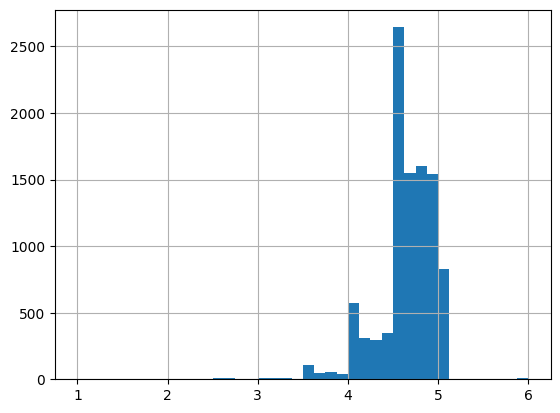

In [151]:
ds['Delivery_person_Ratings'].hist(bins=40)

In [159]:
rating_str_f = lambda lim_a, lim_b: f"Delivery-Person Rating [{lim_a}, {lim_b})"
ds_new_rating = ds.copy()

rating_discrete = [(1, 3.5), (3.5, 4.5), (4.5, 5.0), (5.0, 6.5)]

for lim_a, lim_b in rating_discrete:
  ds_new_rating[rating_str_f(lim_a, lim_b)] = np.zeros(ds.shape[0])

# we use the old 'clean' ds to iterate through but make changes in the new one
for i, value in ds['Delivery_person_Ratings'].items():
  
  for value_range in rating_discrete:
    lim_a, lim_b = value_range
    
    value = float(value)
    
    if value >= lim_a and value < lim_b:
      ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1


C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_new_rating[rating_str_f(lim_a, lim_b)][i] = 1
C:\Users\Omen\AppData\Local\Temp\ipykernel_17720\3674172683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds

In [165]:
#ds_new_rating = ds_new_rating.drop('Delivery_person_Ratings', axis=1)
ds_new_rating

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,"Delivery-Person Rating [1, 3.5)","Delivery-Person Rating [3.5, 4.5)","Delivery-Person Rating [4.5, 5.0)","Delivery-Person Rating [5.0, 6.5)"
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45,0.0,0.0,1.0,0.0
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667,0.0,0.0,1.0,0.0
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667,0.0,1.0,0.0,0.0
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45,0.0,0.0,1.0,0.0
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Very Low,1939,HYDRES05DEL01,haze,Buffet,motorcycle,28,17.433.809,78.386.744,17.443.809,78.396.744,22.61,60.0,0.0,2.52,1.246.666.667,0.0,0.0,1.0,0.0
9996,Very Low,1B05,SURRES14DEL01,mist,Drinks,electric_scooter,26,21.157.729,72.768.726,21.167.729,72.778.726,24.98,73.0,0.0,2.41,20.7,0.0,0.0,1.0,0.0
9997,Very Low,74AB,SURRES05DEL01,mist,Drinks,scooter,32,21.175.104,72.804.342,21.185.104,72.814.342,24.99,73.0,0.0,2.77,20.25,0.0,0.0,1.0,0.0
9998,Very Low,5F66,SURRES02DEL02,mist,Snack,scooter,31,21.186.608,72.794.136,21.206.608,72.814.136,25.01,73.0,0.0,3.42,15.8,0.0,1.0,0.0,0.0


тож я потратив 2 години, шоб почистити одну змінну...

## to be continued...

In [32]:
ds[ds.notna()].count().sort_values()

Distance (km)                   9080
Traffic_Level                   9085
TARGET                          9459
weather_description             9995
temperature                     9995
humidity                        9995
precipitation                   9995
Type_of_order                  10000
Type_of_vehicle                10000
Delivery_person_Age            10000
Delivery_person_Ratings        10000
ID                             10000
Restaurant_longitude           10000
Delivery_location_latitude     10000
Delivery_location_longitude    10000
Delivery_person_ID             10000
Restaurant_latitude            10000
dtype: int64

In [47]:
len(ds['TARGET'].unique())

3371

цільова змінна має 9459 заповнених рядків, але тільки 3371 унікальних значень...